In [1]:
'''
Hieronder wordt eerst het csv file dat we gecreeërd hebben vanuit de comments onder de posts van feyenoord 
wedstrijden in de eredivisie hebben geopend als een dictionary. Er zijn twee verschillende csv files gemaakt:
eentje voor de gewonnen wedstrijden en eentje voor de niet gewonnen wedstrijden. De csv module wordt geïmporteerd
zodat de csv file gemakkelijk en snel geopend kan worden. Ook wordt vast van de pattern.nl module de sentiment 
functie geïmporteerd om later een nederlands talige sentiment analyse uit te kunnne voeren.
'''

'\nHieronder wordt eerst het csv file dat we gecreeërd hebben vanuit de comments onder de posts van feyenoord \nwedstrijden in de eredivisie hebben geopend als een dictionary. Er zijn twee verschillende csv files gemaakt:\neentje voor de gewonnen wedstrijden en eentje voor de niet gewonnen wedstrijden. De csv module wordt geïmporteerd\nzodat de csv file gemakkelijk en snel geopend kan worden. Ook wordt vast van de pattern.nl module de sentiment \nfunctie geïmporteerd om later een nederlands talige sentiment analyse uit te kunnne voeren.\n'

In [2]:
# Draai deze cel één keer, als je pattern nog niet hebt geïnstalleerd:
!pip install pattern --no-deps

In [3]:
import csv                                             #csv module importeren om data in te lezen (Gijs)
filename = "../Data/comments_niet_gewonnen_strip.csv"
with open(filename, "r") as csvfile:                   #met de with function het csv file openen van de niet gewonnen wedstrijden (Gijs)
    reader = csv.DictReader(csvfile, delimiter=';')    #DictReader functie maakt telkens een dict van elke rij
    csv_data_niet_gewonnen = list(reader)              #De resultaten van de DictReader aan een lijst toevoegen (Gijs)

In [4]:
filename = "../Data/comments_gewonnen_strip.csv"
with open(filename, "r") as csvfile:                   #met de with function het csv file openen van de gewonnen wedstrijden (Gijs)
    reader = csv.DictReader(csvfile, delimiter=';')    #DictReader functie maakt telkens een dict van elke rij
    csv_data_gewonnen = list(reader)                   #De resultaten van de DictReader aan een lijst toevoegen (Gijs)

In [5]:
from pattern.nl import sentiment as sentiment_nl       #sentiment module importeren om de 'negativiteit (polariteit)' te kunnen meten van de comments (Gijs)

In [6]:
print(csv_data_niet_gewonnen[:5])

[{'Comment_Number': '1', 'Name ': 'pp.daan', 'Date': '16-10-21 16:29:30', 'Likes': '5', 'Comment': '1 ding Schandalig!'}, {'Comment_Number': '2', 'Name ': 'grizzlystuff9', 'Date': '16-10-21 16:29:35', 'Likes': '1', 'Comment': '\U0001f972'}, {'Comment_Number': '3', 'Name ': 'ivy_0181_', 'Date': '16-10-21 16:29:36', 'Likes': '7', 'Comment': 'Wtf man'}, {'Comment_Number': '4', 'Name ': '22sauvage', 'Date': '16-10-21 16:29:37', 'Likes': '50', 'Comment': 'Nooit meer dessers aub.'}, {'Comment_Number': '5', 'Name ': 'kayvanheess_', 'Date': '16-10-21 16:29:37', 'Likes': '71', 'Comment': 'Weg met kokcu en dessers'}]


In [7]:
print(csv_data_gewonnen[:5])

[{'\ufeffComment_Number': '1', 'Name ': 'gavinlooman', 'Date': '04-11-21 21:59:54', 'Likes': '205', 'Comment': 'Ik weet niet wat ik heb gezien maar het maakt me niks uit, 3 punten💪🤩'}, {'\ufeffComment_Number': '2', 'Name ': 'reinensink_', 'Date': '04-11-21 21:59:55', 'Likes': '125', 'Comment': 'In Slot we trust 💪🏻'}, {'\ufeffComment_Number': '3', 'Name ': '0181.joey_', 'Date': '04-11-21 21:59:58', 'Likes': '0', 'Comment': '😍😍'}, {'\ufeffComment_Number': '4', 'Name ': 'alexinailyana', 'Date': '04-11-21 21:59:59', 'Likes': '101', 'Comment': 'enchanting😸🌗🌗'}, {'\ufeffComment_Number': '5', 'Name ': 'diealdsieger', 'Date': '04-11-21 22:00:01', 'Likes': '3', 'Comment': '🔥🔥'}]


In [8]:
"""
Sentiment analyse uitvoeren voor alle comments die zijn geplaatst. 
In beide csv files zijn 300 comments. Aan de hand van de sentiment analyse een variabele maken die telt hoeveel 
negatieve comments er in die csv file aanwezig waren. Doe dit oor beide csv files, daarna kunnen we vergelijken
tussen de twee csv files en ondervinden of er in verhouding meer negatieve comments waren onder de posts van de niet
gewonnen wedstrijden. 
Bedenken wat we met alle emoji's willen. De sentiment module pakt deze niet, misschien moeten we dit handmatig doen 
of bestaat er wel een module voor. De comments met deze emoji's kunnen we dan ook beoordelen en toevoegen aan de count 
variabele.
"""

"\nSentiment analyse uitvoeren voor alle comments die zijn geplaatst. \nIn beide csv files zijn 300 comments. Aan de hand van de sentiment analyse een variabele maken die telt hoeveel \nnegatieve comments er in die csv file aanwezig waren. Doe dit oor beide csv files, daarna kunnen we vergelijken\ntussen de twee csv files en ondervinden of er in verhouding meer negatieve comments waren onder de posts van de niet\ngewonnen wedstrijden. \nBedenken wat we met alle emoji's willen. De sentiment module pakt deze niet, misschien moeten we dit handmatig doen \nof bestaat er wel een module voor. De comments met deze emoji's kunnen we dan ook beoordelen en toevoegen aan de count \nvariabele.\n"

In [9]:
csv_data_niet_gewonnen_negatief = []                              #Lege lijst maken om hier alle comments in toe te voegen die negatief geladen zijn
for item in csv_data_niet_gewonnen:                               #Voor elke dictionary in de csv data 
    polarity, subjectivity = sentiment_nl(item['Comment'])        #De polariteit van de comments checken
    if polarity < 0:                                              #Als de polariteit van de comment negatief is
        csv_data_niet_gewonnen_negatief.append(item['Comment'])   #Voeg je die comment toe aan de daarvoor aangemaakte lijst
    else:                                                         #Als de polariteit niet negatief is
        continue                                                  #Door naar de volgende comment

for comment in csv_data_niet_gewonnen_negatief:                   #Elke comment apart printen voor het overzicht
    print(comment)
hvl_neg_com_niet_gewonnen = len(csv_data_niet_gewonnen_negatief)  #De hoeveelheid negatieve comments tellen aan de hand van de len() functie (en toevoegen aan een variabele) om deze later te kunnen vergelijken
print(hvl_neg_com_niet_gewonnen)

1 ding Schandalig!
Schaam je dood!!!!
😔
Wat is die Dessers slecht zeg. Niet normaal
Ongekend slecht
Ik Begin mijn vertrouwen in feyenoord langzamerhand kwijt te raken
Dessers dessers dessers … wat ben je allemaal aan het doen man. 😮
Zelfs vrouwen voetbal is intressanter dan dit schandalig!
Tegen NEC verloren we al bijna en nu krijg je echt de deksel op de neus tegen een degradatiekandidaat. Met dit voetbal ga je geen top 3 eindigen
Schaam je kapot , tegen RKC
Zwaar onverdiend.... heel vies spel van rkc
Cookk cookkk 😢
Maak die kansen nou eens af😩
Schaam je kapot
😢
Dramatisch
😡😡
Weer terug bij stap 1, zat er al op te wachten dat dit soort zooi ging gebeuren dit seizoen
😬🙄😐
Verloren van een hoop schilders en schoenenmakers als bijbaan voetballer
Je zal nooit echt meedoen als je dit soort wedstrijden speelt
Schaam je dood
Goeie wissels ook 😒
Winnen van psv en THUIS gelijk spelen tegen RKC😢 typerend weer 🤓 hoop dat arne voorlopig een paar spelers ff niet meer opstel! Wat een aanfluiting
Vit

In [10]:
csv_data_gewonnen_negatief = []                              #Lege lijst maken om hier alle comments in toe te voegen die negatief geladen zijn
for item in csv_data_gewonnen:                               #Voor elke dictionary in de csv data 
    polarity, subjectivity = sentiment_nl(item['Comment'])   #De polariteit van de comments checken
    if polarity < 0:                                         #Als de polariteit van de comment negatief is
        csv_data_gewonnen_negatief.append(item['Comment'])   #Voeg je die comment toe aan de daarvoor aangemaakte lijst
    else:                                                    #Als de polariteit niet negatief is
        continue                                             #Door naar de volgende comment

for comment in csv_data_gewonnen_negatief:                   #Elke comment apart printen voor het overzicht
    print(comment)
hvl_neg_com_gewonnen = len(csv_data_gewonnen_negatief)       #De hoeveelheid negatieve comments tellen aan de hand van de len() functie (en toevoegen aan een variabele) om deze later te kunnen vergelijken
print(hvl_neg_com_gewonnen)

OP NAAR MEER!🔥
Rare wedstrijd, maar 3 punten
weer 10 jaar ouder, maar die 3 punten gaan weer lekker mee naar rdam 🔥🔥
😢😢😢
Wijnval had wel rood mogen hebben
@mathijsgoris dood lijk hou je smoel
Jaja allemaal hypocriete fans nu maar eerst dessers helemaal afbreken🤡🤡🤡🤡
Zielige kk club
@matthijs_bak als til zijn contract ooit verloopt en hij dan zegt van ik vertrek naar feyenoord kunnen we hem binnen halen denk als til mag kiezen dat die feyenoord leuker vind
@jochemdej heb de documontaire gezien op disney plus feyenoord zit in zwaar weer financieel maar dat wisten we eigenlijk al jaren
Waanzinnig
Feyenoord supporter zijn is aardig slecht voor je hart af en toe 😫❤️🤍
Nuuul 😒
Verdiend👏👏 en die Blom mag wel naar de oogarts...manman
Niet gelijk denken lands kampioen he
@simonhoogenraad teleurstellend dit
Veel te krap steeds kom op nou
@renske_8888 😡😡
@isis.vdk hartpijn, en in de laatste minuut nog ook😓💔
19


In [11]:
'''
Hieronder wordt eerst de emoji module geïmporteerd zodat we analyses uit kunnen voeren met emoji's. Van github is 
een lijst gebruikt die de valence aangeeft van de meest gebruikte emoji's. Aangezien er in de comments een aantal 
emoji's op een negatieve manier gebruikt werden en deze niet als negatief waren geklasificeerd in de lijst, is de 
lijst iets aangepast zodat die specifieke emoji's wel als negatief werden gezien door de code. Van de lijst is een 
csv file gemaakt zodat de valence van de emoji's gecheckt kan worden wanneer deze voorkomt in een code. Later worden
ook de emoji en regex modules geïmporteerd om de get_emoji functie te definiëren en te laten werken. 
'''

"\nHieronder wordt eerst de emoji module geïmporteerd zodat we analyses uit kunnen voeren met emoji's. Van github is \neen lijst gebruikt die de valence aangeeft van de meest gebruikte emoji's. Aangezien er in de comments een aantal \nemoji's op een negatieve manier gebruikt werden en deze niet als negatief waren geklasificeerd in de lijst, is de \nlijst iets aangepast zodat die specifieke emoji's wel als negatief werden gezien door de code. Van de lijst is een \ncsv file gemaakt zodat de valence van de emoji's gecheckt kan worden wanneer deze voorkomt in een code. Later worden\nook de emoji en regex modules geïmporteerd om de get_emoji functie te definiëren en te laten werken. \n"

In [12]:
!pip install emoji                                          #emoji module instaleren om daar mee te werken

In [13]:
filename = "../Data/emoji_valence.csv"                     #csv file met polarity van emoji's gedownload van github
with open(filename, "r") as csvfile:                       #deze lijst aangepast aan de hand van een aanal emoji's en geopend als list of dicts
    reader = csv.DictReader(csvfile, delimiter=';')    
    emoji_valence_dict = list(reader)   

In [14]:
print(emoji_valence_dict[:5])

[{'\ufeffEmoji': '👿', 'Name(s)': 'imp', 'Polarity': '-4'}, {'\ufeffEmoji': '🖕', 'Name(s)': 'middle_finger; fu', 'Polarity': '-4'}, {'\ufeffEmoji': '😾', 'Name(s)': 'pouting_cat', 'Polarity': '-4'}, {'\ufeffEmoji': '😡', 'Name(s)': 'rage; pout', 'Polarity': '-4'}, {'\ufeffEmoji': '😠', 'Name(s)': 'angry', 'Polarity': '-3'}]


In [15]:
negative_emoji_list = []                                     #een aparte lijst aanmaken om alle negatief geladen emoji's in te kunnen stoppen
for emoji in emoji_valence_dict:                             #voor elke emoji in de csv file met de polariteit van emoji's
    if int(emoji['Polarity']) < 0:                           #kijken of die emoji negatief geladen is, dus polarity lager dan 0
        negative_emoji_list.append(emoji['\ufeffEmoji'])     #als dit het geval is deze emoji toevoegen aan de lijst voor negatief geladen emoji's
    else:
        continue                                             #als de polarity groter of gelijk is aan 0 dan door naar de volgende emoji in de csv file
        
print(negative_emoji_list)

['👿', '🖕', '😾', '😡', '😠', '😧', '💔', '💩', '😱', '🙀', '😈', '😭', '😟', '👎', '😰', '😖', '😕', '😢', '😿', '😞', '🤕', '😨', '😳', '☹️', '😬', '🤥', '🤢', '😮', '😣', '💀', '☠️', '🤧', '😫', '😒', '😩', '😥', '😵', '🤒', '👊', '😦', '👻', '😯', '😷', '🤓', '😔', '🙄', '🙁', '😜', '😓', '🤔', '🤐', '🤡', '😐', '😴']


In [16]:
import emoji                                               #modules importeren om de "get_emoji" functie te kunnen definiëren
import regex

In [17]:
def get_emoji(text):             
    "Get a list of emoji from a text."
    all_emoji = []               
    data = regex.findall(r'\X', text)                     
    for word in data:
        if emoji.is_emoji(word):                         #voor elke woord in de tekst wordt gekeken of een emoji voorkomt
            all_emoji.append(word)                       #wanneer emoji aanwezig wordt deze toegevoegd aan een lijst genaamd 'all_emoji'
    return all_emoji                                     #na het uitvoeren van de functie wordt de lijst met emoji's gereturned om verder mee te kunnen werken in vervolgcode

In [18]:
comment_with_negative_emoji_ng = []                                  #lijst aanmaken voor negatieve comments gedetecteerd aan de hand van emoji
for item in csv_data_niet_gewonnen:                                  #voor elke dict in de list of dicts van niet gewonnen wedstrijden
    emoji_in_comment = get_emoji(item['Comment'])                    #worden de emoji's uit de coments gehaald en in een lijst gestopt
    for i in emoji_in_comment:                                       #voor elke emoji die terug komt uit de get_emoji functie 
        if i in negative_emoji_list:                                 #kijken of die emoji aanwezig is in de lijst van negatief geladen emoji's
            comment_with_negative_emoji_ng.append(item['Comment'])   #de gehele comment met negatieve emoji's toevoegen aan een lijst 
        else:
            continue                                                 #wanneer de emoji niet in de lijst voorkomt van negatieve emoji's, door naar de volgende

comment_with_negative_emoji_ng_set = set(comment_with_negative_emoji_ng) #van de lijst met negatieve comments gedetecteerd aan de hand van emoji een set maken om dubbele eruit te halen (emoji's worden vaker getypt in een comment)
print(comment_with_negative_emoji_ng_set)

{'Goeie wissels ook 😒', '😡😡', '😢', 'Die tweede helft sloeg echt helemaal nergens op😳Vitesse is kampioen tijd rekken🤮', 'Vitesse🤡🤡', 'Ik snap dessers wel met doorspelen en de scheids😮😮', '😮', 'Maak die kansen nou eens af😩', '😢😢😢', 'Vitesse meest zielige club van de Eredivisie, ongelooflijk zeg 🤡', 'Dessers dessers dessers … wat ben je allemaal aan het doen man. 😮', 'Straftraining!!! Het moet is een keertje klaar zijn dat als we kunnen inlopen, het vertikken om de 3 punten binnen te slepen. Want dat is 9 van de 10 keer het geval 😡😡', '😢 En nu weer doorrrrrr!', '😬🙄😐', '😢😢😢😢', 'Vitesse wat en schijt ploeg, Bazoer🤡🤡🤡🤡🤡🤡', 'Op naar meer nederlagen! 💩💩💩', '🤡🤡🤡', '😐', 'Nooit meer laten fluiten die jood!🤥🤥', 'Vitesse 🤡🤡', 'Feijenoord kan niet beter.Hetzelfde als vorig seizoen is het.😢 Kut.', 'Winnen van psv en THUIS gelijk spelen tegen RKC😢 typerend weer 🤓 hoop dat arne voorlopig een paar spelers ff niet meer opstel! Wat een aanfluiting', '😔', 'Report My Team 🤓', '😢👏👏👏👏', 'Ali reza 😔', '😢 was g

In [19]:
comment_with_negative_emoji_g = []                                   #lijst aanmaken voor negatieve comments gedetecteerd aan de hand van emoji
for item in csv_data_gewonnen:                                       #voor elke dict in de list of dicts van gewonnen wedstrijden
    emoji_in_comment = get_emoji(item['Comment'])                    #worden de emoji's uit de coments gehaald en in een lijst gestopt
    for i in emoji_in_comment:                                       #voor elke emoji die terug komt uit de get_emoji functie 
        if i in negative_emoji_list:                                 #kijken of die emoji aanwezig is in de lijst van negatief geladen emoji's
            comment_with_negative_emoji_g.append(item['Comment'])    #de gehele comment met negatieve emoji's toevoegen aan een lijst 
        else:
            continue                                                 #wanneer de emoji niet in de lijst voorkomt van negatieve emoji's, door naar de volgende

comment_with_negative_emoji_g_set = set(comment_with_negative_emoji_g) #van de lijst met negatieve comments gedetecteerd aan de hand van emoji een set maken om dubbele eruit te halen (emoji's worden vaker getypt in een comment)
print(comment_with_negative_emoji_g_set)

{'Feyenoord supporter zijn is aardig slecht voor je hart af en toe 😫❤️🤍', '@renske_8888 😡😡', 'Nuuul 😒', '@isis.vdk hartpijn, en in de laatste minuut nog ook😓💔', '😢😢😢', '@jay_boll_ 😂😢', 'Jaja allemaal hypocriete fans nu maar eerst dessers helemaal afbreken🤡🤡🤡🤡'}


In [20]:
csv_data_niet_gewonnen_negatief_set = set(csv_data_niet_gewonnen_negatief)                                   #een set maken van de eerder gevonden negatieve comments uit niet gewonnen wedstrijden (sentiment analyse) om samen te kunnen voegen
total_comments_negative_ng = comment_with_negative_emoji_ng_set.union(csv_data_niet_gewonnen_negatief_set)   #sets van de sentiment analyse en emoji analyse samenvoegen om totale negatieve comments te krijgen (sets om dubbele comments eruit te filteren)
print(total_comments_negative_ng)
totaal_hvl_neg_comments_ng = len(total_comments_negative_ng)                                                 #met de len() functie de hoeveelheid negatieve comments bereken en opslaan in een variabele voor latere analyse
print(totaal_hvl_neg_comments_ng)

{'Schaam je kapot , tegen RKC', '😢', 'Je zal nooit echt meedoen als je dit soort wedstrijden speelt', 'Verloren van een hoop schilders en schoenenmakers als bijbaan voetballer', 'wat een antivoetbal, feyenoord speelde slecht maar god nog nooit heb ik een ploeg zo veel zien tijdrekken. wat een antivoetbal dat vitesse', '😮', 'Maak die kansen nou eens af😩', 'Heel zielig clubje dat Vitesse', 'Jammer jongens, hoofd omhoog en op naar de volgende match👏👏', 'Ik snap er niks meer van wat Vitesse liet zien was zeker geen voetbal! Krankzinnig!', 'Vitesse meest zielige club van de Eredivisie, ongelooflijk zeg 🤡', 'Zelfs vrouwen voetbal is intressanter dan dit schandalig!', 'Domme persoonlijke fouten maar wat een ongelooflijk eng anti voetbal dat Vitesse zeg 🤮', 'Tegen NEC verloren we al bijna en nu krijg je echt de deksel op de neus tegen een degradatiekandidaat. Met dit voetbal ga je geen top 3 eindigen', 'Was niet om over naar huis te schrijven! Maarja zware week achter de rug. Toch had je aan h

In [21]:
csv_data_gewonnen_negatief_set = set(csv_data_gewonnen_negatief)                                      #een set maken van de eerder gevonden negatieve comments uit niet gewonnen wedstrijden (sentiment analyse) om samen te kunnen voegen
total_comments_negative_g = comment_with_negative_emoji_g_set.union(csv_data_gewonnen_negatief_set)   #sets van de sentiment analyse en emoji analyse samenvoegen om totale negatieve comments te krijgen (sets om dubbele comments eruit te filteren)
print(total_comments_negative_g)
totaal_hvl_neg_comments_g = len(total_comments_negative_g)                                            #met de len() functie de hoeveelheid negatieve comments bereken en opslaan in een variabele voor latere analyse
print(totaal_hvl_neg_comments_g)

{'Veel te krap steeds kom op nou', 'Wijnval had wel rood mogen hebben', '@renske_8888 😡😡', '@isis.vdk hartpijn, en in de laatste minuut nog ook😓💔', 'Waanzinnig', 'Niet gelijk denken lands kampioen he', '😢😢😢', 'Zielige kk club', 'Jaja allemaal hypocriete fans nu maar eerst dessers helemaal afbreken🤡🤡🤡🤡', 'OP NAAR MEER!🔥', 'Feyenoord supporter zijn is aardig slecht voor je hart af en toe 😫❤️🤍', '@mathijsgoris dood lijk hou je smoel', 'Nuuul 😒', 'Rare wedstrijd, maar 3 punten', '@matthijs_bak als til zijn contract ooit verloopt en hij dan zegt van ik vertrek naar feyenoord kunnen we hem binnen halen denk als til mag kiezen dat die feyenoord leuker vind', '@jochemdej heb de documontaire gezien op disney plus feyenoord zit in zwaar weer financieel maar dat wisten we eigenlijk al jaren', 'Verdiend👏👏 en die Blom mag wel naar de oogarts...manman', '@jay_boll_ 😂😢', '@simonhoogenraad teleurstellend dit', 'weer 10 jaar ouder, maar die 3 punten gaan weer lekker mee naar rdam 🔥🔥'}
20


In [22]:
#hoeveelheid negatieve comments niet gewonnen wedstrijden
print(totaal_hvl_neg_comments_ng)
#hoeveelheid negatieve comments gewonnen wedstrijden
print(totaal_hvl_neg_comments_g)

83
20


In [23]:
'''
De matplotlib.pyplot module importeren zodat er visualizaties gemaakt kunnen worden. De verzamelde hoeveelheid 
negatieve comments zijn dan met elkaar vergeleken per gewonnen of niet gewonnen wedstrijd en zichtbaar gemaakt 
in een barchart. In totaal waren er per type resultaat 300 comments aanwezig in de verschillende csv files. 
Bij de niet gewonnen wedstrijden waren er uiteindelijk 83 negatuieve comments gedetecteerd door onze code. Voor
de gewonnen wedstrijden waren er 20 negatieve comments gedetecteerd door onze code in de data.
'''

'\nDe matplotlib.pyplot module importeren zodat er visualizaties gemaakt kunnen worden. De verzamelde hoeveelheid \nnegatieve comments zijn dan met elkaar vergeleken per gewonnen of niet gewonnen wedstrijd en zichtbaar gemaakt \nin een barchart. In totaal waren er per type resultaat 300 comments aanwezig in de verschillende csv files. \nBij de niet gewonnen wedstrijden waren er uiteindelijk 83 negatuieve comments gedetecteerd door onze code. Voor\nde gewonnen wedstrijden waren er 20 negatieve comments gedetecteerd door onze code in de data.\n'

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt                          #matplotlib module importeren om vizualisatie mee te kunnen maken

In [25]:
import seaborn as sns
sns.set_style("whitegrid")                               #standaard outline van de plots aanpassen naar een "whitegrid" zodat het er al iets fraaier uitziet

In [26]:
hvl_neg_comm_dict = {                                    #een dict maken van onze resultaten zpdat daar een barchart van gemaakt kan worden
    'Resultaat wedstrijden' : ['Niet gewonnen wedstrijden', 'Gewonnen wedstrijden'], 
    'Hoeveelheid negatieve comments' : [totaal_hvl_neg_comments_ng, totaal_hvl_neg_comments_g]
}
print(hvl_neg_comm_dict)

{'Resultaat wedstrijden': ['Niet gewonnen wedstrijden', 'Gewonnen wedstrijden'], 'Hoeveelheid negatieve comments': [83, 20]}


In [27]:
import pandas as pd                                     #pandas module importeren om via deze weg een barchart te kunnen maken waarbij kleur veranderen en labels toevoegen simpeler is dan bij numpy

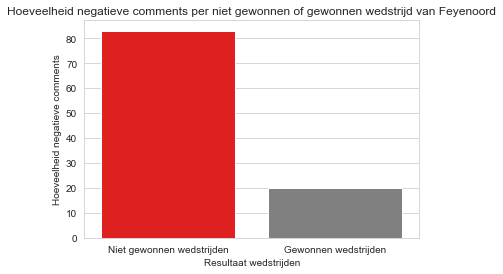

In [28]:
df = pd.DataFrame.from_dict(hvl_neg_comm_dict)                                                        #Dataframe maken voor in de pandas module vanuit de gecreeeërde dictionary
ax = sns.barplot(x='Resultaat wedstrijden',y='Hoeveelheid negatieve comments',color='red',data=df)    #een barplot maken met op de x-as het resultaat van de wedstrijden en op de y-as de hoeveelheid negatieve comments onder de posts met de standaard kleur rood voor de bars in het figuur. 
ax.set_title('Hoeveelheid negatieve comments per niet gewonnen of gewonnen wedstrijd van Feyenoord')  #De plot een titel geven 
ax.set_ylabel('Hoeveelheid negatieve comments')                                                       #De y-as een label geven
ax.set_xlabel('Resultaat wedstrijden')                                                                #De x-as een label geven
ax.patches[1].set_facecolor('gray')                                                                   #De tweede bar in het figuur een andere kleur geven, namelijk de kleur grijs

In [32]:
percentage_neg_comments_ng = (totaal_hvl_neg_comments_ng / 300) * 100                #percentage berekenen van het aantal negatief geladen comments gedetecteerd door onze code ten opzichte van het totaal aantal comments (300) voor de niet gewonnen wedstrijden
print(percentage_neg_comments_ng)

percentage_neg_comments_g = (totaal_hvl_neg_comments_g / 300) * 100                  #percentage berekenen van het aantal negatief geladen comments gedetecteerd door onze code ten opzichte van het totaal aantal comments (300) voor de gewonnen wedstrijden
print(percentage_neg_comments_g)

27.666666666666668
6.666666666666667
